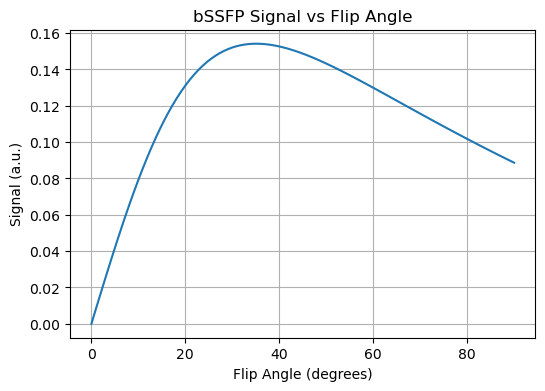

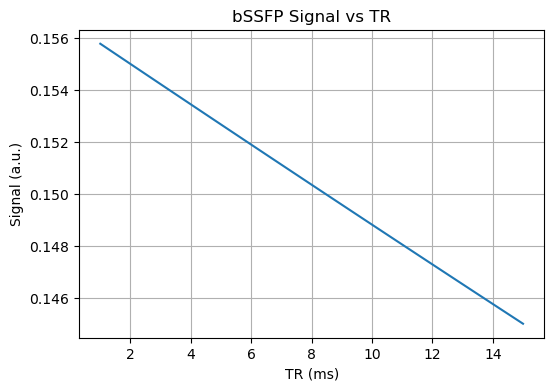

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def bssfp_signal(alpha, TR, df, T1, T2):
    E1 = np.exp(-TR/T1)
    E2 = np.exp(-TR/T2)
    
    # Off-resonance induced phase per TR
    dphi = 2 * np.pi * df * TR
    
    numerator = np.sin(alpha)*(1 - E1)*E2*np.exp(-1j*dphi)
    denominator = 1 - E1*np.cos(alpha) - E2*(E1 - np.cos(alpha))*np.exp(-1j*dphi)
    
    S = np.abs(numerator / denominator)
    return S


T1 = 1.0    # in seconds
T2 = 0.1    # in seconds
df_fixed = 0.0  # Off-resonance frequency in Hz
TR_fixed = 0.005  # Repetition time in seconds (5 ms)
alpha_fixed_deg = 40  # Flip angle in degrees
alpha_fixed = np.deg2rad(alpha_fixed_deg)

# 1) Signal vs Flip Angle
alphas_deg = np.linspace(0, 90, 100)
alphas_rad = np.deg2rad(alphas_deg)
signal_vs_alpha = [bssfp_signal(a, TR_fixed, df_fixed, T1, T2) for a in alphas_rad]

plt.figure(figsize=(6,4))
plt.plot(alphas_deg, signal_vs_alpha)
plt.title("bSSFP Signal vs Flip Angle")
plt.xlabel("Flip Angle (degrees)")
plt.ylabel("Signal (a.u.)")
plt.grid(True)
plt.show()

# 2) Signal vs TR
TR_values = np.linspace(0.001, 0.015, 100)  
signal_vs_TR = [bssfp_signal(alpha_fixed, tr, df_fixed, T1, T2) for tr in TR_values]

plt.figure(figsize=(6,4))
plt.plot(TR_values*1000, signal_vs_TR)
plt.title("bSSFP Signal vs TR")
plt.xlabel("TR (ms)")
plt.ylabel("Signal (a.u.)")
plt.grid(True)
plt.show()




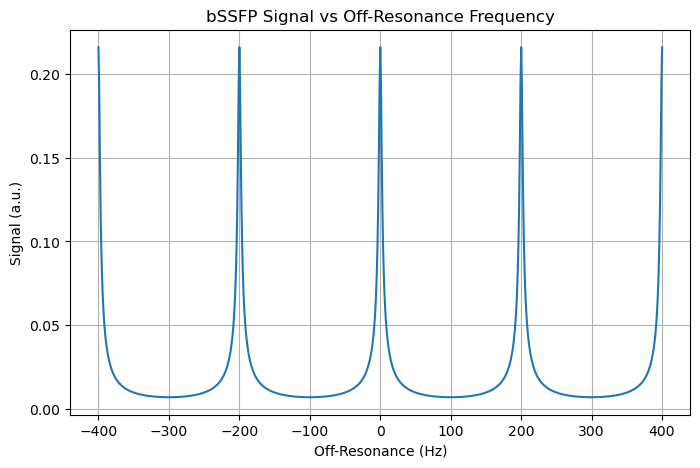

In [ ]:
def bssfp_signal(alpha, TR, df, T1, T2):

    E1 = np.exp(-TR / T1)
    E2 = np.exp(-TR / T2)
    dphi = 2 * np.pi * df * TR

    numerator = np.sin(alpha) * (1 - E1) * E2
    denominator = (1 - E1 * np.cos(alpha)) - (E2 * (E1 - np.cos(alpha)) * np.exp(-1j * dphi))
    S = np.abs(numerator / denominator)
    return S


T1 = 1.0    # seconds
T2 = 0.2    # seconds
TR = 0.005  # 5 ms
alpha_deg = 40
alpha_rad = np.deg2rad(alpha_deg)

# Frequency range: from -400 Hz to +400 Hz in steps of 1 Hz
df_values = np.linspace(-400, 400, 801)
signal_vs_df = [bssfp_signal(alpha_rad, TR, df, T1, T2) for df in df_values]

plt.figure(figsize=(8,5))
plt.plot(df_values, signal_vs_df)
plt.title("bSSFP Signal vs Off-Resonance Frequency")
plt.xlabel("Off-Resonance (Hz)")
plt.ylabel("Signal (a.u.)")
plt.grid(True)
plt.show()


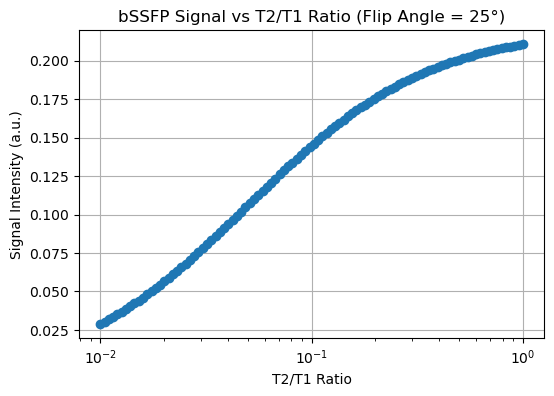

In [ ]:
def bssfp_signal(alpha, TR, df, T1, T2):

    E1 = np.exp(-TR / T1)
    E2 = np.exp(-TR / T2)
    dphi = 2 * np.pi * df * TR

    numerator = np.sin(alpha) * (1 - E1) * E2
    denominator = (1 - E1 * np.cos(alpha)) - (E2 * (E1 - np.cos(alpha)) * np.exp(-1j * dphi))
    S = np.abs(numerator / denominator)
    return S


T1 = 1.0      
TR = 0.005      
flip_angle_deg = 25
alpha = np.deg2rad(flip_angle_deg)
df = 0.0        # On-resonance for simplicity



T2_values = np.logspace(-2, 0, 100)  # 0.01 to 1.0 seconds
signal_values = [bssfp_signal(alpha, TR, df, T1, T2) for T2 in T2_values]


ratio_values = T2_values / T1

plt.figure(figsize=(6,4))
plt.plot(ratio_values, signal_values, marker='o', linestyle='-')
plt.title("bSSFP Signal vs T2/T1 Ratio (Flip Angle = 25°)")
plt.xlabel("T2/T1 Ratio")
plt.ylabel("Signal Intensity (a.u.)")
plt.xscale('log') 
plt.grid(True)
plt.show()



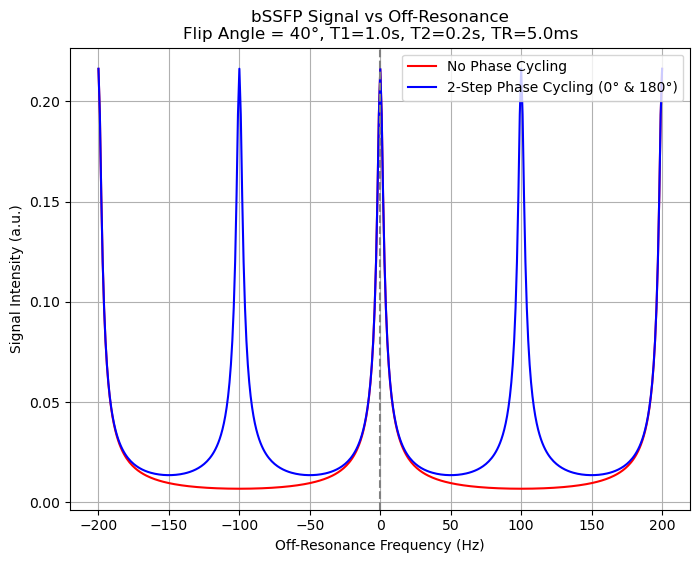

In [ ]:

def bssfp_signal(alpha, TR, df, T1, T2, phase_inc=0.0):
    E1 = np.exp(-TR / T1)
    E2 = np.exp(-TR / T2)

    # Off-resonance induced phase per TR
    dphi = 2 * np.pi * df * TR

    
    effective_phase = dphi + phase_inc

    numerator = np.sin(alpha) * (1 - E1) * E2
    denominator = (1 - E1*np.cos(alpha)) - E2*(E1 - np.cos(alpha))*np.exp(-1j*effective_phase)
    S = np.abs(numerator/denominator)
    return S


T1 = 1.0     # s
T2 = 0.2     # s
TR = 0.005   # 5 ms
alpha_deg = 40
alpha_rad = np.deg2rad(alpha_deg)
df_values = np.linspace(-200, 200, 401) # Off-resonance from -200 to 200 Hz

# No phase cycling scenario
signal_no_pc = [bssfp_signal(alpha_rad, TR, df, T1, T2, phase_inc=0.0) for df in df_values]

# Phase cycling scenario:
# Acquisition 1: RF phase increment = 0°
# Acquisition 2: RF phase increment = 180° (pi radians)
phase_increments = [0.0, np.pi]

# For each off-resonance, compute both acquisitions
signals_pc = []
for df in df_values:
    s_acqs = [bssfp_signal(alpha_rad, TR, df, T1, T2, phase_inc=phi) for phi in phase_increments]
    # Combine them: sum-of-squares combination
    combined = np.sqrt(s_acqs[0]**2 + s_acqs[1]**2)
    signals_pc.append(combined)


plt.figure(figsize=(8,6))
plt.plot(df_values, signal_no_pc, label="No Phase Cycling", color='red')
plt.plot(df_values, signals_pc, label="2-Step Phase Cycling (0° & 180°)", color='blue')
plt.axvline(0, color='gray', linestyle='--')
plt.title(f"bSSFP Signal vs Off-Resonance\nFlip Angle = {alpha_deg}°, T1={T1}s, T2={T2}s, TR={TR*1000:.1f}ms")
plt.xlabel("Off-Resonance Frequency (Hz)")
plt.ylabel("Signal Intensity (a.u.)")
plt.grid(True)
plt.legend()
plt.show()
